# Load the Time series Dataset

In [1]:
import warnings
warnings.simplefilter('ignore')
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from pandas import DataFrame
from matplotlib import pyplot

In [2]:
date_string = "01-01-2019"
date_object = datetime.strptime(date_string, "%d-%m-%Y")
date_object

datetime.datetime(2019, 1, 1, 0, 0)

In [3]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.csv', header=0, index_col=0, squeeze=True, date_parser=parser)
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


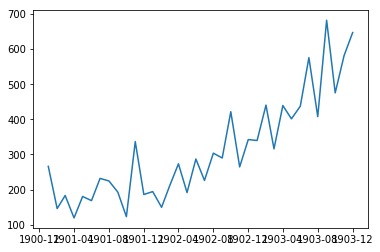

In [4]:
pyplot.plot(series)
pyplot.show()

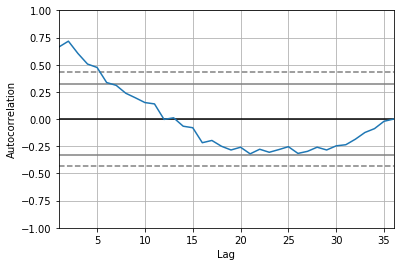

In [5]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

#  Augmented Dickey–Fuller test

In [15]:
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(series))

(3.0601420836411806, 1.0, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328003999999998}, 278.9972644263031)


In [16]:
# Since the test statistics is more than the critical values we reject the null hypothesis and conclude its not stationary

# ACF Plot

### This plot is sometimes called, Correlogram or an autocorrelation plot. 

In [1]:
# ACF is nothing but the correlation between the current lags and the pervious lags

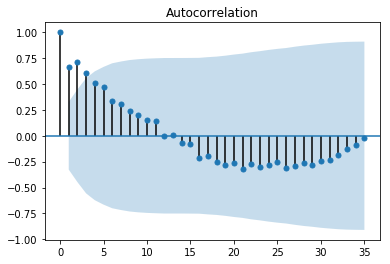

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
pyplot.show()

# PACF Plot

In [3]:
# PACF is nothing but the correlation between the current and the residulas
# (which remains after removing the effects which are already explained by the earlier lag(s))

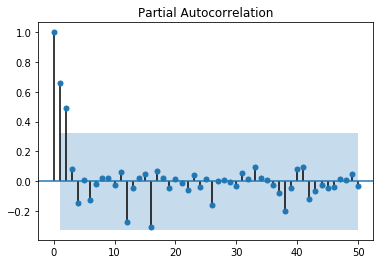

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
pyplot.show()

# Arima Model

In [17]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(6,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(6, 1, 1)   Log Likelihood                -195.241
Method:                       css-mle   S.D. of innovations             62.195
Date:                Wed, 07 Aug 2019   AIC                            408.483
Time:                        18:06:32   BIC                            422.481
Sample:                    02-01-1901   HQIC                           413.315
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.3838      5.667      2.185      0.038       1.276      23.491
ar.L1.D.Sales    -0.5858      0.569     -1.029      0.312      -1.701       0.530
ar.L2.D.Sales     0.0100      0.607     

In [19]:
import os
os.chdir('C://Users//saravana.ayyappa//Desktop//Machine Learning')

In [11]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.217
ARIMA(0, 0, 2) MSE=23989.597
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.206
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18322.029
ARIMA(1, 0, 0) MSE=23112.933
ARIMA(1, 1, 0) MSE=7121.365
ARIMA(1, 1, 1) MSE=7003.687
ARIMA(1, 2, 0) MSE=18608.045
ARIMA(2, 0, 0) MSE=10176.546
ARIMA(2, 1, 0) MSE=5689.929
ARIMA(2, 1, 1) MSE=7759.710
ARIMA(2, 2, 0) MSE=9860.932
ARIMA(4, 1, 0) MSE=6649.595
ARIMA(4, 1, 1) MSE=6796.265
ARIMA(4, 2, 0) MSE=7596.333
ARIMA(4, 2, 1) MSE=4694.870
ARIMA(6, 1, 0) MSE=6810.076
ARIMA(6, 1, 1) MSE=4359.601
ARIMA(6, 2, 0) MSE=6261.187
ARIMA(8, 1, 0) MSE=6579.247
Best ARIMA(6, 1, 1) MSE=4359.601
